# Numerical Calculus

Throughout this section and the next ones, we shall cover the topic of numerical calculus. Calculus has been identified since ancient times as a powerful toolkit for analysing and handling geometrical problems. Since differential calculus was developed by Newton (1642-1727) and Leibniz (1646 - 1716), many different applications have been found, at the point that most of the current science is founded on it (e.g. differential and integral equations). Due to the ever increasing complexity of analytical expressions used in physics and astronomy, their usage becomes more and more impractical, and numerical approaches are more than necessary when one wants to go deeper. This issue has been identified since long ago and many numerical techniques have been developed. We shall cover only the most basic schemes, but also providing a basis for more formal approaches.

# Numerical Differentiation

According to the formal definition of differentiation, given a function $f(x)$ such that $f(x)\in C^1[a,b]$, the first order derivative is given by

$$f'(x) = \frac{d}{dx}f(x) = \left.\frac{d f}{d x}\right|_{x_i} = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

<img src="imgs/tangent.png" width="300" />

(for the numerical analysis we can replace $h \rightarrow \Delta x$)

$$ \left.\frac{d f}{d x}\right|_{x_i} \approx \frac{\Delta f}{\Delta x} = \frac{f(x_i + \Delta x) - f(x_i)}{\Delta x}$$


[//]:  $$ \left.\frac{d f}{d x}\right|_{x_i} = \lim\limits_{\Delta x \to 0} \frac{f(x_i + \Delta x) - f(x_i)}{\Delta x}$$

<img src="imgs/tangent_num.png" width="300" />

* or if our data is stored in arrays
$$ f'(x_i) \approx \frac{f(x_{x+1}) - f(x_i)}{x_{i+1} -x_i} $$

* QA: Interpretation: the derivative is the tangent or the slope at the point of the evaluation or as a rate of change of a function at a given point

### Analytical differentiation is preffered if possilble but numerical differentiation is considered if
* the function cannot be differentiated analytically
* the function is known at discrete points only
* the differentiation is to be automated in an algorithm.


# Motivation... (why?)

* from some physical experiment you obtained the dependence of a pressure of a gas on its temperature $P$ vs. $T$ (real story, but the points are smoothen a bit)

<img src="imgs/pvst.jpg" width="600" />

But the heat capacity is given by (equation from the book of Thermodynamics)...:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$

* which you can read as how the P is changing with T - and its changing at each point...

* which means to get $C_v$ you need to find the derivative of the $P$ vs. $T$!
* So I can take numerical derivative of the points and get $C_v$

<img src="imgs/cvvt.jpg" width="600" />

* a slope in the $P vs T$ plot correspond to a POINT in the $C_v vs T$ plot (see point by point the behaviour of the first function )

* on the plot $P vs T$ you see that there is some bending
* but on plot $C_v vs T$ you can see a clear change of the derivative

# derivative is also used to detect the 'edge' in an image:

<img src="imgs/edge_detection_deriv.jpg" width="1000" />

## There are many schemes (esquemas) to calculate the derivative numerically.
The most popular are three:

<img src="imgs/differences.png" width="300" />

* forward difference:

$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h} - O(h) $$
where $h=x_{i+1}-x_i$
* backward difference:

$$ f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h} + O(h) $$

* central difference:

$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + O(h^2) $$

$O(h),  O(h^2) $ - errors of the approximations

### Where the schemes come from, what does $O(h^2)$ mean?

### Taylor expansion
$$ f(x \pm h) \approx f(x) \pm f'(x)h + \frac{f''(x)h^2}{2} \pm \frac{f'''(x)h^3}{3!} + ...  $$

###  for the forward difference if we take only the positive part:

$$ f(x + h) \approx f(x) + f'(x)h + \frac{f''(x)h^2}{2!} + \frac{f'''(x)h^3}{3!} + ...  $$

rearanging...

$$ f'(x)h= f(x + h)-f(x)- \frac{f''(x)h^2}{2!} - \frac{f'''(x)h^3}{3!}...$$

and dividing by 'h':

$$ f'(x)= \frac{f(x + h) - f(x)}{h} - \frac{f''(x)h}{2!} - \frac{f'''(x)h^2}{3!}...$$

so the bigger contribution has $\frac{f''(x)h}{2!}$ part hence the forward difference including the error is: 

$$ f'(x)= \frac{f(x + h) - f(x)}{h} - O(h)$$



### for the central difference we take Taylor expansion for each sign

$$ f(x + h) \approx f(x) + f'(x)h + \frac{f''(x)h^2}{2!} + \frac{f'''(x)h^3}{3!} + ...  $$
$$ f(x - h) \approx f(x) - f'(x)h + \frac{f''(x)h^2}{2!} - \frac{f'''(x)h^3}{3!} + ...  $$

Central difference comes from rearanging the terms of the Taylor expansion 
$$ f'(x) \approx \frac{f(x + h) - f(x-h)}{2h} + \frac{f'''(x)h^2}{3!} $$

hence the central difference including the error is:

$$ f'(x) \approx \frac{f(x + h) - f(x-h)}{2h} + O(h^2) $$


Note that if for example h=0.1 the error is smaller for central difference scheme than for forward of backward difference scheme - hence the central difference scheme is better and used by scipy

In [1]:
3*3**2

27

### Comparing the three schemes 
<img src="imgs/differences_comparison.png" width="800" />

# Numerical differentiation using SCIPY and NUMPY!!!!
1) if we know the function we use `scipy.misc.derivative`

2) if we have only points but we dont know the function we use: `numpy.gradient`

## 1) if we know the function we use `scipy.misc.derivative`
The documentation of the "scipy.misc.derivative" routine says 

* "Given a function, use a central difference formula with spacing dx to compute the nth derivative at x0." (https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

### Example 1 - demonstrate the usage of `derivative`

In [2]:
#Example from the website:
from scipy.misc import derivative

def func(x):
    return x**3 + x**2

derivative(func, 1.0, dx=1e-6)

4.999999999921734

In [3]:
3*1**2+2*1

5

### Example 2 - demonstrate the importance of dx

Take a function $f(x) = x^3$ and evaluate the first derivative of that function using the previous numerical scheme at the point $x_0=2.0$ and using $h=0.5,\ 0.1,\  0.05$

Compare with the real function and plot the tangent line using the found values of the slope.

Analytical solution: $f'(x)=3x^2 \rightarrow f'(2)=12$ 

Quick numerical solution: use library derivative from scipy.misc

In [20]:
from scipy.misc import derivative
import numpy as np
import matplotlib.pyplot as plt

It is used as:
```python
derivative(func, x0, dx=1.0, n=1, args=(), order=3)
```
__Parameters__<br/>
`func` : function →
    Input function.<br/>
`x0` : float →
    The point at which `n`-th derivative is found.<br/>
`dx` : float, optional →
    Spacing.<br/>
`n` : int, optional →
    Order of the derivative. Default is 1.<br/>
`args` : tuple, optional →
    Arguments<br/>
`order` : int, optional → 
    Number of points to use, must be odd.<br/>


In [21]:
def function(x):
    return x**3.0

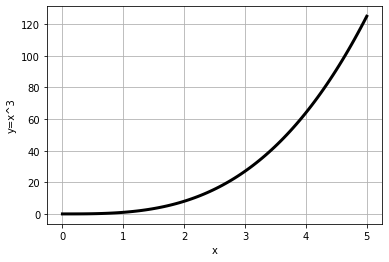

In [22]:
# plotting the function

xmin = 0.0
xmax = 5.0

x = np.linspace( xmin, xmax, 100 )
fig,ax=plt.subplots(1,1)

# plot the function y=x^3
ax.plot(x, x**3.0, color="black", label="function", linewidth=3, zorder=10 )
ax.set_xlabel('x')
ax.set_ylabel('y=x^3')
ax.grid(True)

In [7]:
x0=2.0

In [8]:
# the value of the derivative analytically for this particular function y=x**3
def analytical_deriv(x):
    return 3*x**2
print("y'(2)=",analytical_deriv(x0) )

y'(2)= 12.0


dx=2.5
18.25
dx=0.1
12.010000000000009


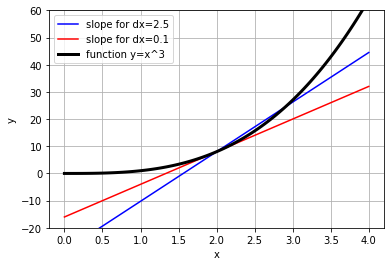

In [28]:
# plotting the slopes of each dx
fig, ax = plt.subplots(1,1)
colors=['blue','red','green']
for i in range(2):
    dx=eval(input('dx='))
    print(derivative(function,x0,dx=dx) )
    # plot the function y=x^3
    x = np.linspace((x0-2.0), (x0+2.0), 100)
    y = derivative(function,x0,dx=dx)*(x - x0) + function(x0)
    ax.plot(x,y,c=colors[i],label='slope for dx='+str(dx))
ax.plot(x, x**3.0, color="black", label="function y=x^3", linewidth=3, zorder=10 )
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_ylim(-20,60)
ax.grid(True)
    #plt.show()

### Using `derivative` for many points
* scipy.misc.derivative does not accept list
* scipy.misc.derivative accepts floats or numpy arrays
* but I know the function!!!!

In [30]:
def function(x):
    return np.sin(x)

In [31]:
x=np.linspace(-np.pi,np.pi,100) # numpy array

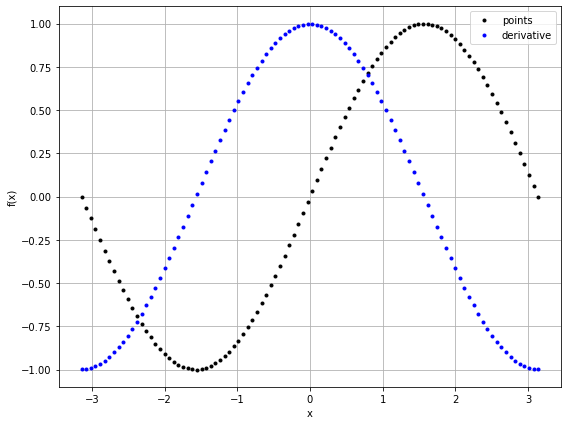

In [32]:
y_prime=derivative(function,x,dx=0.1)
fig, ax = plt.subplots(1,1,figsize=(9,7))
ax.plot(x,np.sin(x),'.k',label='points')
ax.plot(x,y_prime,'.b',label='derivative')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()
ax.grid(True)

## 2) if we have only points but we dont know the function we use: `numpy.gradient`

In [13]:
import numpy as np
from scipy import stats
#x = np.arange(-5,5,0.1)
#y = stats.norm.pdf(x, 0, 1)
#np.savetxt('xvec.txt', x)
#np.savetxt('yvec.txt', y)

In [34]:
x=np.loadtxt('xvec.txt')
y=np.loadtxt('yvec.txt')

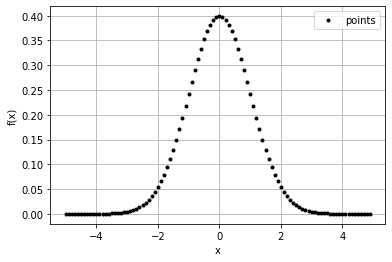

In [35]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.k',label='points')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
ax.legend()

In [37]:
y_prime=np.gradient(y, x)

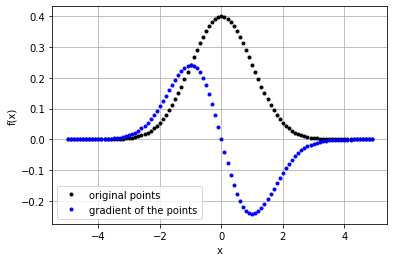

In [38]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.plot(x,y,'.k',label='original points')
ax.plot(x,y_prime,'.b',label='gradient of the points')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True)
ax.legend()

### Homework 6 ():

* create notebook called: homework_6.ipynb (no spaces please)

* inside write a function: `deriv(func,a,method,h)`
`func` is a function that I can define
`a` is a point (float) at which I wante to evaluate the derivative
`method` is a string, and can have three options `forward`,`central`,`backward`
`h` is a step

* ***remember the function must not print anything, just return a single value***!!!
* to choose between schemes ('central','forward'..) use `if`, `elif`

### So If I call your homework notebook:

In [19]:
%run homework_6.ipynb

In [ ]:
def function(x):
    return x**3.0

In [ ]:
print(deriv(function,2.0,method='forward',h=0.1) )

In [ ]:
print(deriv(function,2.0,method='backward',h=0.1))  

In [ ]:
print(deriv(function,2.0,method='central',h=0.1)) 